### If you are a star war fan this project is for you ! We will learn about the Obi-Wan Kenobi . The goal is to scrap a wikipedia page and create a word cloud to understand what comes out of the article !

### Let's retrieve a clean HTML page from a variable

In [2]:
import requests
from bs4 import BeautifulSoup
r = requests.get( "https://fr.wikipedia.org/wiki/Obi-Wan_Kenobi" )
html_doc = r.text
soup = BeautifulSoup(html_doc, 'html.parser')

corpus = [ ]
for p in soup.find_all("p"):
  corpus.append(p.text)
# Visualization of first element
corpus[:1]


['Pour les articles homonymes, voir Obi-Wan Kenobi (homonymie).\n']

### Let's install spacy corresponding to the language specifies ( in this case french)

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
!pip install spacy -q

In [8]:
import spacy

In [10]:
!python -m spacy download fr_core_news_sm -q

[+] Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')


C:\Users\chekk\anaconda3\lib\site-packages\cupy\_environment.py:216: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(
C:\Users\chekk\anaconda3\lib\site-packages\cupy\_environment.py:216: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(
C:\Users\chekk\anaconda3\lib\site-packages\cupy\_environment.py:216: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(


In [11]:
# Import spacy and initialize french language
import fr_core_news_sm
nlp = fr_core_news_sm.load()

### We need to create a complete corpus of text in a variable. And We need to make some basic cleaning too

##### The line of code hereunder processes a list of text documents stored in the corpus variable. It creates a new list called stripped_corpus where each text document from the corpus is stripped of leading and trailing whitespace characters.

In [13]:
# Stripped corpus of text
stripped_corpus = [text.strip() for text in corpus]
# Join corpus to make one full string
clean_corpus = " ".join(stripped_corpus)

# Remove punctuation and lowercase
import re
clean_corpus = re.sub(r"[!\"#$%&()*+,-./:;<=>?@[\\\]^_`{|}~]+", "", clean_corpus).lower()

# Visualize first 100 characters
print("{}...".format(clean_corpus[:100]))

pour les articles homonymes voir obiwan kenobi homonymie  obiwan kenobi également dit ben kenobi est...


### Now I load the clean corpus in a doc object

In [14]:
doc = nlp(clean_corpus)

### With the wordcloud library, let's create a first word cloud

In [29]:
from spacy.lang.fr.stop_words import STOP_WORDS
print(STOP_WORDS)

{'façon', 'aux', 'après', 'treize', 'certains', 'sur', 'elles-memes', 'par', "c'", 'desquelles', 'n’', 'etc', 'vu', 'peu', 'avons', 'proche', "quelqu'un", 'etaient', 'semble', 'dans', 'quarante', 'du', 'seize', 'vos', 'meme', 'celle-la', 'vous-mêmes', 'parfois', 'celle', 'aurait', 'divers', 'miens', 'seuls', 'votres', 'c’', 'antérieur', 'telle', 'là', 'restent', 'ainsi', 'donc', 'spécifique', 'les', 'tout', 'étais', 'd’', 'car', 'ce', 'celles-là', 'avais', 'ça', 'diverses', "qu'", 'deuxième', 'entre', 'toute', 'unes', 'douzième', 'desormais', 'sa', 'autrui', 'tres', 'cette', 'toi-même', 'vais', 'auraient', 'tellement', 'aie', 'pres', 'aussi', 'autres', 'na', 'toi-meme', 'sien', 'certaine', 'notre', 'revoici', 'ceux-ci', 'certes', 'elles-mêmes', 'hi', 'egalement', 'dit', 'puisque', 'auxquels', 'dix-neuf', 'et', 'etre', 'le', 'vers', 'pourrait', 's’', 'quoi', 'durant', 'stop', 'autre', "s'", 'déjà', 'etais', 'mille', 'son', 'tienne', 'restant', 'quelles', 'leur', 'enfin', 'plusieurs', 't

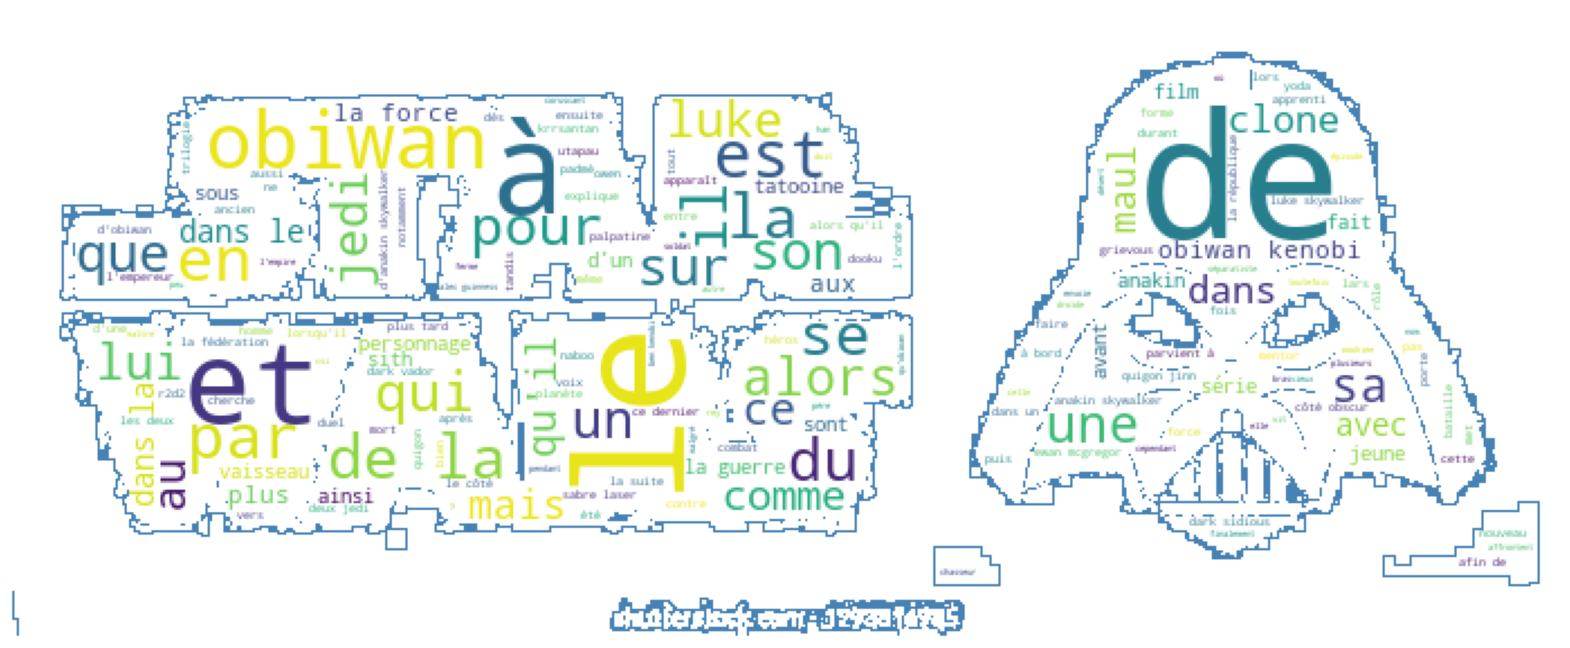

In [19]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
import wordcloud

starwars_mask = np.array(Image.open("starwars_logo.jpg"))
# Instanciate wordcloud
wd = wordcloud.WordCloud(background_color="white", contour_width=1, contour_color='steelblue', mask = starwars_mask)
# Generate wordcloud 
cloud = wd.generate(doc.text)
# Show plot
plt.figure(figsize = (20, 20))
plt.imshow(cloud)
plt.axis("off")
plt.show()

### Let's import the STOP WORDS

In [20]:
from spacy.lang.fr.stop_words import STOP_WORDS
# Visualize first 10 words
for i, word in enumerate(STOP_WORDS):
    if i < 10:
        print(word)
    else:
         break

façon
aux
après
treize
certains
sur
elles-memes
par
c'
desquelles


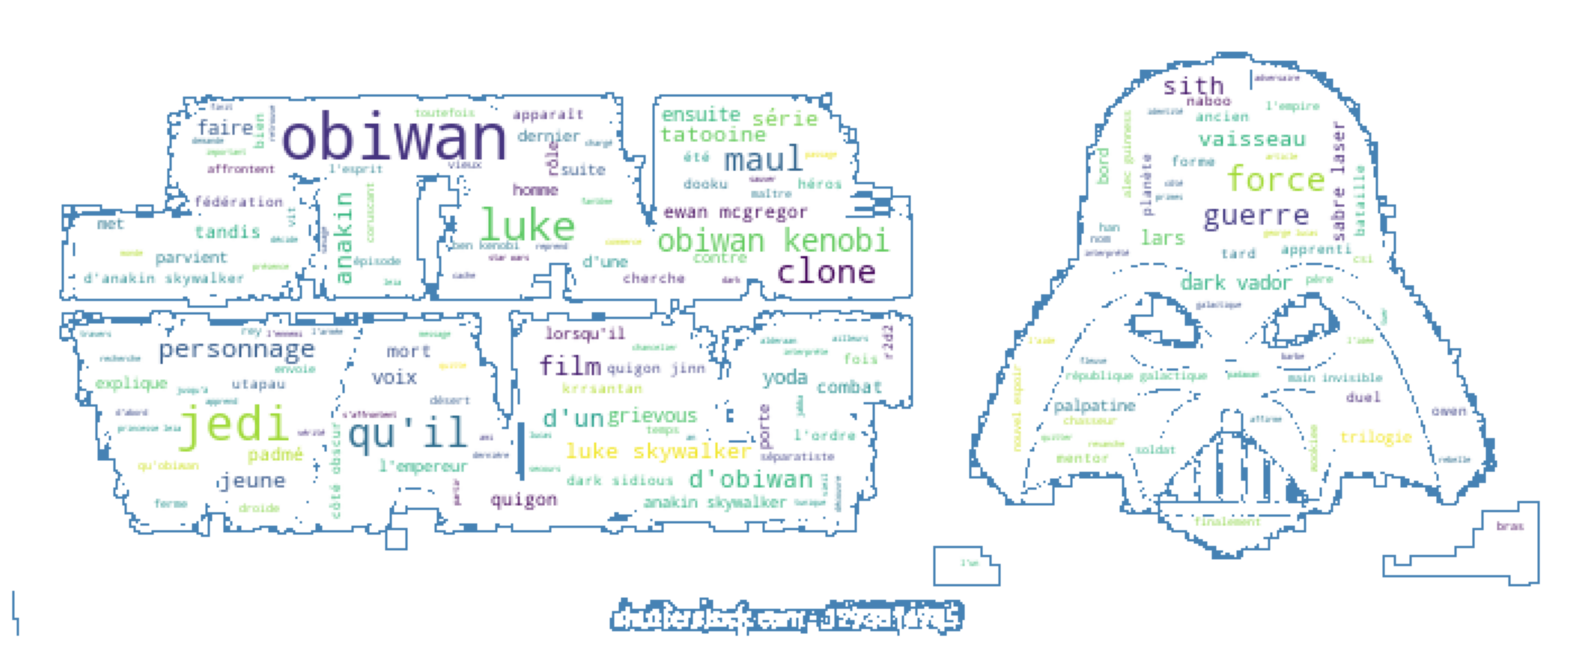

In [21]:
wd = wordcloud.WordCloud(background_color="white", contour_width=1, contour_color='steelblue', mask = starwars_mask,stopwords = STOP_WORDS)
# Generate wordcloud 
cloud = wd.generate(doc.text)
# Show plot
plt.figure(figsize = (20, 20))
plt.imshow(cloud)
plt.axis("off")
plt.show()

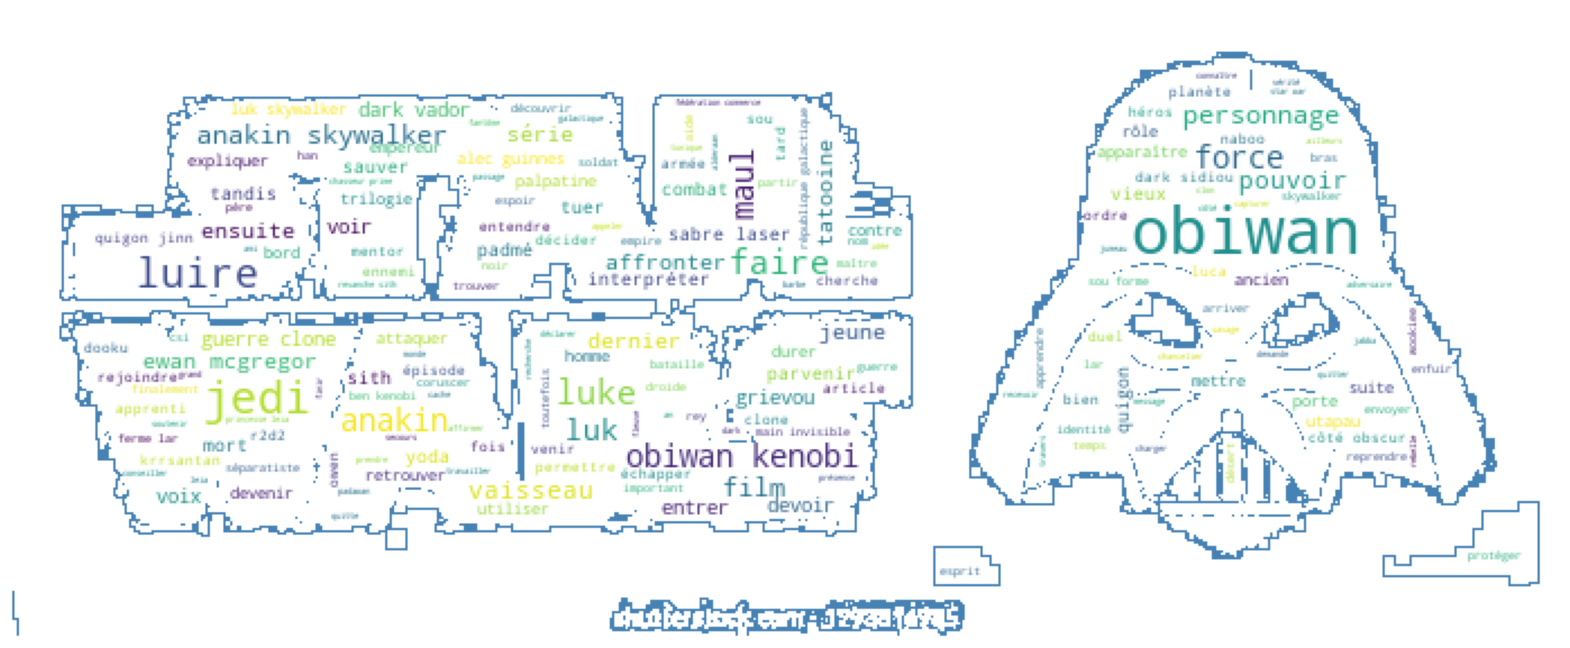

In [34]:
# Create lemmatization 
lemma = [token.lemma_ for token in doc if token.lemma_ not in STOP_WORDS]
# Create a new corpus 
corpus_lemma = " ".join(lemma)
# Create a word cloud 
wd = wordcloud.WordCloud(background_color="white", contour_width=1, contour_color='steelblue', mask = starwars_mask, 
                         stopwords=STOP_WORDS)

# Generate wordcloud
cloud = wd.generate(corpus_lemma)

# Visualize wordcloud 
plt.figure(figsize = (20, 20))
plt.imshow(cloud)
plt.axis("off")
plt.show()

### Let's push analysis further! Some words are really common in the corpus, find which of them

In [28]:
# Import pandas to create a series
import pandas as pd 
# Create a DataFrame of lemmatized token
lemmadf = pd.Series(lemma)
# Create a mask of all counted values greater than 15
common = lemmadf.value_counts()>15
#Apply the mask
common = common[common]
#Visualize first ten terms 
common[:10]

obiwan       True
             True
jedi         True
luire        True
anakin       True
skywalker    True
luke         True
faire        True
kenobi       True
luk          True
dtype: bool

In [31]:
new_stop_words = common.index
STOP_WORDS_updated = STOP_WORDS.union(new_stop_words)

### Create a new word cloud without stop words

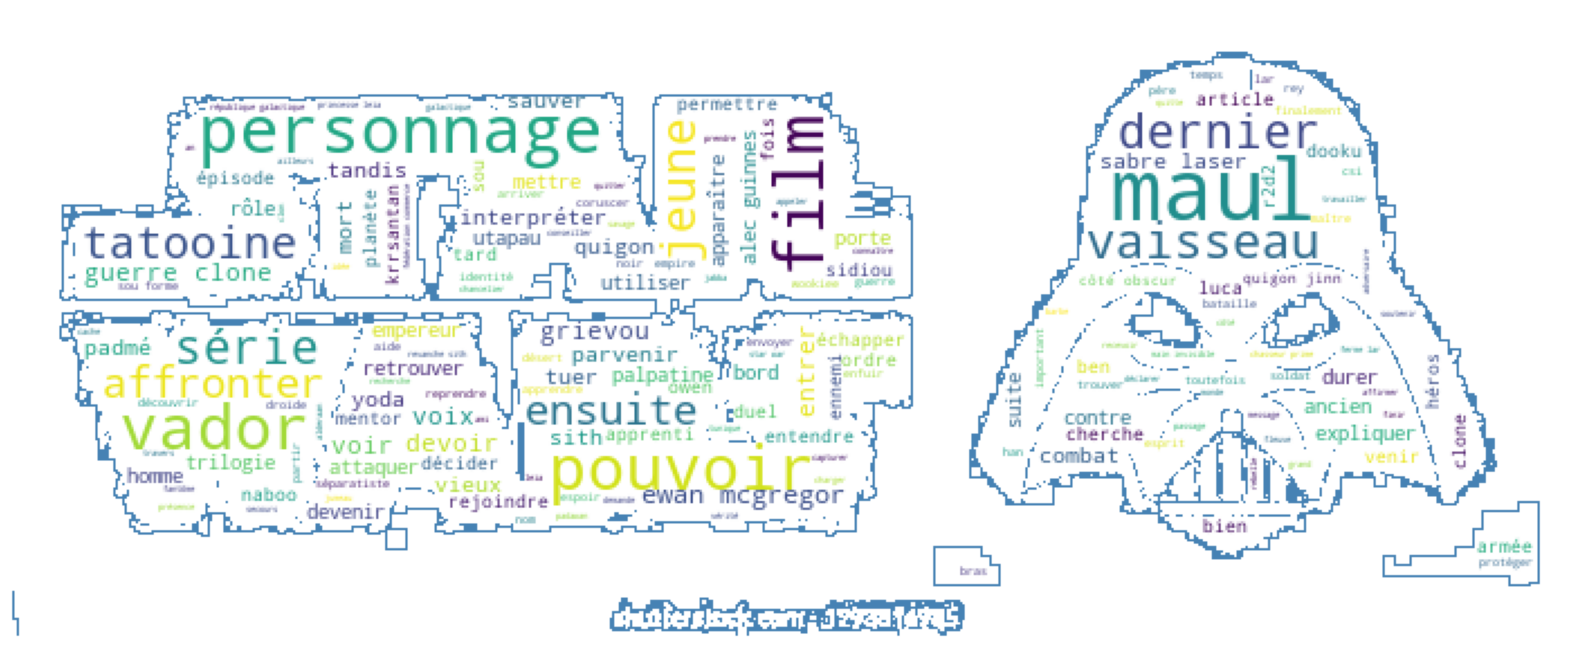

In [32]:
# Create a word cloud 
wd = wordcloud.WordCloud(background_color="white", contour_width=1, contour_color='steelblue', mask = starwars_mask, 
               stopwords=STOP_WORDS_updated)

# Generate wordcloud
cloud = wd.generate(corpus_lemma)

# Visualize wordcloud 
plt.figure(figsize = (20, 20))
plt.imshow(cloud)
plt.axis("off")
plt.show()

### I will now start building a tf-idf matrix. Let's first create a DataFrame containing the lemmatized corpus without the updated stop words

In [38]:
lemma = [token.lemma_ for token in doc if token.lemma_ not in STOP_WORDS_updated]
# Create a new corpus 
corpus_lemma = " ".join(lemma)
corpus_series=pd.Series(corpus_lemma)
corpus_df = pd.DataFrame(corpus_series, columns=["documents"])

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus_df['documents'])
# X is a generator. We can transform that as an array
dense = X.toarray()
dense

array([[0.01177857, 0.01177857, 0.01177857, ..., 0.01177857, 0.02355714,
        0.02355714]])

In [41]:
# Creating a DataFrame with all the words and tf-idf score 
tfid_df = pd.DataFrame(dense, 
                        columns=[x for x in vectorizer.get_feature_names()])

tfid_df

,11,136,179,182,19,2000,20004142,2004,2014,2016,...,émission,épique,épisode,épreuve,équilibre,étoile,étouffe,évader,évènement,œuvre
0,0.011779,0.011779,0.011779,0.011779,0.011779,0.011779,0.011779,0.011779,0.011779,0.011779,...,0.023557,0.011779,0.058893,0.011779,0.011779,0.023557,0.011779,0.011779,0.023557,0.023557
